In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')


# **Import Data**

In [ ]:
df_train = pd.read_csv('/input/sales-prediction-dataset/RoS_train.csv')
df_test = pd.read_csv('/input/sales-prediction-dataset/RoS_test.csv')
print(f'shape of train set is : {df_train.shape} & shape of test set is: {df_test.shape}')

shape of train set is : (168607, 17) & shape of test set is: (169141, 17)


# **preprocessing**

**Fill the missing Values**

In [ ]:
df_train.isnull().sum()

Sales                            0
Customers                        0
Open                             0
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance            428
CompetitionOpenSinceMonth    53646
CompetitionOpenSinceYear     53646
Promo2                           0
Promo2SinceWeek              84799
Promo2SinceYear              84799
PromoInterval                84799
month                            0
year                             0
dtype: int64

In [ ]:
df_test.isnull().sum()

Customers                        0
Open                             0
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance            429
CompetitionOpenSinceMonth    53985
CompetitionOpenSinceYear     53985
Promo2                           0
Promo2SinceWeek              84811
Promo2SinceYear              84811
PromoInterval                84811
month                            0
year                             0
ID                               0
dtype: int64

In [ ]:
df_train['CompetitionOpenSinceMonth'].fillna(df_train['CompetitionOpenSinceMonth'].median(0), inplace = True)
df_test['CompetitionOpenSinceMonth'].fillna(df_test['CompetitionOpenSinceMonth'].median(0), inplace = True)

a = df_train['CompetitionOpenSinceMonth'].isnull().sum()
b =df_test['CompetitionOpenSinceMonth'].isnull().sum()

df_train['CompetitionOpenSinceYear'].fillna(df_train['CompetitionOpenSinceYear'].median(0), inplace = True)
df_test['CompetitionOpenSinceYear'].fillna(df_test['CompetitionOpenSinceYear'].median(0), inplace = True)

c = df_train['CompetitionOpenSinceYear'].isnull().sum()
d = df_test['CompetitionOpenSinceYear'].isnull().sum()

df_train['CompetitionDistance'].fillna(df_train['CompetitionDistance'].median(0), inplace = True)
df_test['CompetitionDistance'].fillna(df_test['CompetitionDistance'].median(0), inplace = True)

e = df_train['CompetitionDistance'].isnull().sum()
f = df_test['CompetitionDistance'].isnull().sum()

print(f'number of null value for CompetitionOpenSinceMonth feature of train is: {a},\nnumber of null value for CompetitionOpenSinceMonth feature of test is: {b}')
print(f'number of null value for CompetitionOpenSinceYear feature of train is: {c},\nnumber of null value for CompetitionOpenSinceYear feature of test is: {d}')
print(f'number of null value for CompetitionDistance feature of train is: {e},\nnumber of null value for CompetitionDistance feature of test is: {f}')


number of null value for CompetitionOpenSinceMonth feature of train is: 0,
number of null value for CompetitionOpenSinceMonth feature of test is: 0
number of null value for CompetitionOpenSinceYear feature of train is: 0,
number of null value for CompetitionOpenSinceYear feature of test is: 0
number of null value for CompetitionDistance feature of train is: 0,
number of null value for CompetitionDistance feature of test is: 0


In [ ]:
labels = ['Promo2SinceWeek', 'Promo2SinceYear']
for i in labels:
    df_train[i].fillna(0, inplace = True)
    print(f' null value for train set is : {i}, {df_train[i].isnull().sum()}')


for j in labels:
    df_test[j].fillna(int(0), inplace = True)
    print(f' null value for test set is : {j}, {df_test[j].isnull().sum()}')

df_train['PromoInterval'].fillna('none', inplace = True)
df_test['PromoInterval'].fillna('none', inplace = True)

 null value for train set is : Promo2SinceWeek, 0
 null value for train set is : Promo2SinceYear, 0
 null value for test set is : Promo2SinceWeek, 0
 null value for test set is : Promo2SinceYear, 0


In [ ]:
df_train.isnull().sum()

Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
month                        0
year                         0
dtype: int64

In [ ]:
df_test.isnull().sum()

Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
month                        0
year                         0
ID                           0
dtype: int64

**Eliminate the useless Features**

In [ ]:
#Becuase open feature is "1" for all instances

df_train.drop('Open', axis = 'columns', inplace = True)
df_test.drop('Open', axis = 'columns', inplace = True)

In [ ]:
df_train.head(5)

,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,month,year
0,5571,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,none,7,15
1,6714,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,none,7,15
2,5371,519,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,none,7,15
3,4257,449,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,none,7,15
4,4209,447,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,none,6,15


In [ ]:
df_test.head(5)

,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,month,year,ID
0,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,none,7,15,1
1,544,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,none,7,15,2
2,480,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,none,7,15,3
3,420,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,none,6,15,4
4,476,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,none,6,15,5


**Data type and Visualization**

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168607 entries, 0 to 168606
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sales                      168607 non-null  int64  
 1   Customers                  168607 non-null  int64  
 2   Promo                      168607 non-null  int64  
 3   StateHoliday               168607 non-null  object 
 4   SchoolHoliday              168607 non-null  int64  
 5   StoreType                  168607 non-null  object 
 6   Assortment                 168607 non-null  object 
 7   CompetitionDistance        168607 non-null  float64
 8   CompetitionOpenSinceMonth  168607 non-null  float64
 9   CompetitionOpenSinceYear   168607 non-null  float64
 10  Promo2                     168607 non-null  int64  
 11  Promo2SinceWeek            168607 non-null  float64
 12  Promo2SinceYear            168607 non-null  float64
 13  PromoInterval              16

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169141 entries, 0 to 169140
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Customers                  169141 non-null  int64  
 1   Promo                      169141 non-null  int64  
 2   StateHoliday               169141 non-null  object 
 3   SchoolHoliday              169141 non-null  int64  
 4   StoreType                  169141 non-null  object 
 5   Assortment                 169141 non-null  object 
 6   CompetitionDistance        169141 non-null  float64
 7   CompetitionOpenSinceMonth  169141 non-null  float64
 8   CompetitionOpenSinceYear   169141 non-null  float64
 9   Promo2                     169141 non-null  int64  
 10  Promo2SinceWeek            169141 non-null  float64
 11  Promo2SinceYear            169141 non-null  float64
 12  PromoInterval              169141 non-null  object 
 13  month                      16

In [ ]:
Id = df_test.iloc[ : , -1]
Id.shape

(169141,)

In [ ]:
cat_df = df_train[['Promo', 'SchoolHoliday', 'Promo2', 'PromoInterval']]
cat_df = cat_df.astype('object')

In [ ]:
df_train[cat_df.columns] = cat_df.copy()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168607 entries, 0 to 168606
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sales                      168607 non-null  int64  
 1   Customers                  168607 non-null  int64  
 2   Promo                      168607 non-null  object 
 3   StateHoliday               168607 non-null  object 
 4   SchoolHoliday              168607 non-null  object 
 5   StoreType                  168607 non-null  object 
 6   Assortment                 168607 non-null  object 
 7   CompetitionDistance        168607 non-null  float64
 8   CompetitionOpenSinceMonth  168607 non-null  float64
 9   CompetitionOpenSinceYear   168607 non-null  float64
 10  Promo2                     168607 non-null  object 
 11  Promo2SinceWeek            168607 non-null  float64
 12  Promo2SinceYear            168607 non-null  float64
 13  PromoInterval              16

In [ ]:
cat1_df = df_test[['Promo', 'SchoolHoliday', 'Promo2']]
cat1_df = cat1_df.astype('object')

In [ ]:
df_test[cat1_df.columns] = cat1_df.copy()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169141 entries, 0 to 169140
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Customers                  169141 non-null  int64  
 1   Promo                      169141 non-null  object 
 2   StateHoliday               169141 non-null  object 
 3   SchoolHoliday              169141 non-null  object 
 4   StoreType                  169141 non-null  object 
 5   Assortment                 169141 non-null  object 
 6   CompetitionDistance        169141 non-null  float64
 7   CompetitionOpenSinceMonth  169141 non-null  float64
 8   CompetitionOpenSinceYear   169141 non-null  float64
 9   Promo2                     169141 non-null  object 
 10  Promo2SinceWeek            169141 non-null  float64
 11  Promo2SinceYear            169141 non-null  float64
 12  PromoInterval              169141 non-null  object 
 13  month                      16

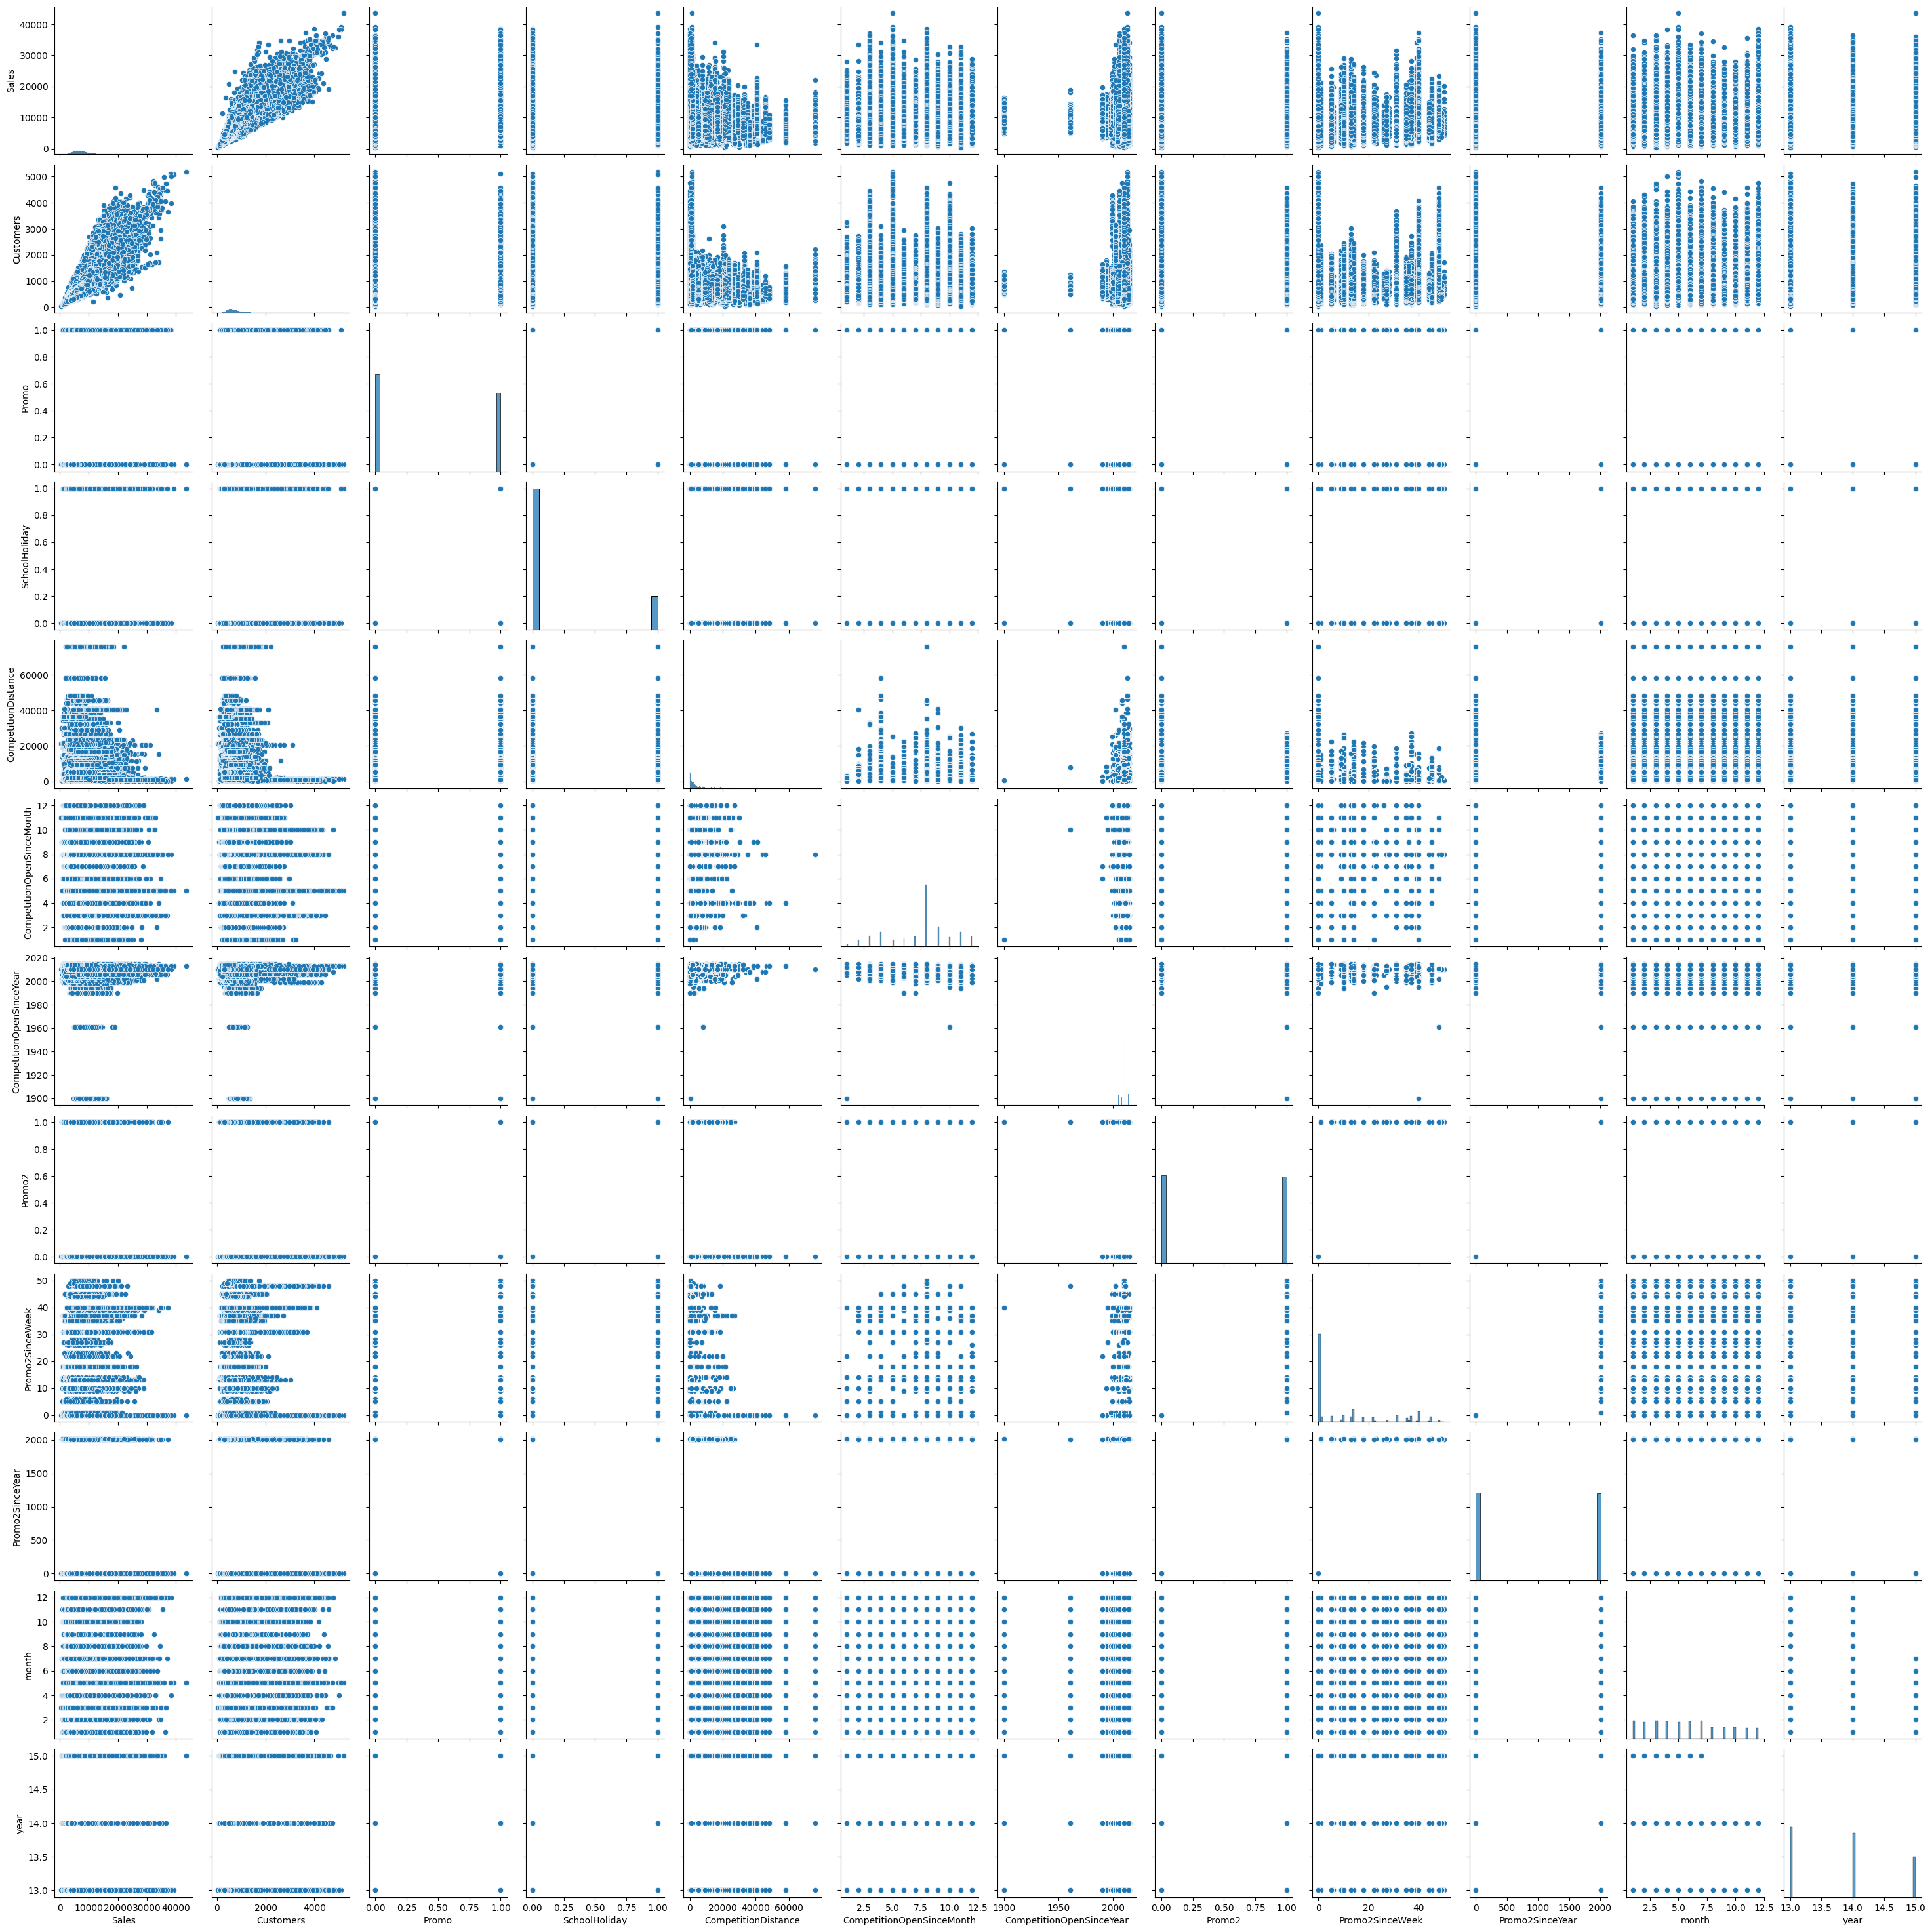

In [ ]:
sns.pairplot(df_train)

In [ ]:
y = df_train.iloc[ : , 0]

In [ ]:
df_train.describe()

,Sales,Customers,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,month,year
count,168607.000000,168607.000000,168607.000000,168607.000000,168607.000000,168607.000000,168607.000000,168607.000000,168607.000000
mean,7720.344547,763.247244,5445.006969,7.477614,2009.120825,11.563897,999.964574,5.855522,13.830737
std,3432.319164,401.002459,7813.690752,2.673268,4.962762,15.297645,1005.862980,3.327141,0.777344
min,326.000000,40.000000,20.000000,1.000000,1900.000000,0.000000,0.000000,1.000000,13.000000
25%,5417.000000,520.000000,710.000000,6.000000,2008.000000,0.000000,0.000000,3.000000,13.000000
50%,7078.000000,678.000000,2320.000000,8.000000,2010.000000,0.000000,0.000000,6.000000,14.000000
75%,9235.000000,893.000000,6870.000000,9.000000,2011.000000,22.000000,2012.000000,8.000000,14.000000
max,43559.000000,5192.000000,75860.000000,12.000000,2015.000000,50.000000,2015.000000,12.000000,15.000000


In [ ]:
df_test.describe()

,Customers,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,month,year,ID
count,169141.000000,169141.000000,169141.000000,169141.000000,169141.000000,169141.000000,169141.000000,169141.000000,169141.000000
mean,762.805866,5445.534140,7.469372,2009.106438,11.568419,1003.016140,5.848736,13.832199,84571.000000
std,399.033744,7821.919483,2.675520,5.119032,15.287397,1005.876224,3.323592,0.776927,48826.945278
min,36.000000,20.000000,1.000000,1900.000000,0.000000,0.000000,1.000000,13.000000,1.000000
25%,521.000000,710.000000,6.000000,2008.000000,0.000000,0.000000,3.000000,13.000000,42286.000000
50%,676.000000,2310.000000,8.000000,2010.000000,0.000000,0.000000,6.000000,14.000000,84571.000000
75%,893.000000,6870.000000,9.000000,2011.000000,22.000000,2012.000000,8.000000,14.000000,126856.000000
max,5152.000000,75860.000000,12.000000,2015.000000,50.000000,2015.000000,12.000000,15.000000,169141.000000


In [ ]:
df_train.drop('Sales', axis = 'columns', inplace = True)

In [ ]:
cat_columns = df_train.select_dtypes(exclude = np.number).columns
num_columns = df_train.select_dtypes(include = np.number).columns

print(cat_columns,  '\n',  num_columns)

Index(['Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'Promo2', 'PromoInterval'],
      dtype='object') 
 Index(['Customers', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear',
       'month', 'year'],
      dtype='object')


In [ ]:
encoder = LabelEncoder()
for i in cat_columns:
    df_train[i] = encoder.fit_transform(df_train[i])

In [ ]:
standard = StandardScaler()

for i in num_columns:
    b = df_train[i].values.reshape(-1 , 1)
    df_train[i] = standard.fit_transform(b)

In [ ]:
df_train.head()

,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,month,year
0,-0.506849,1,0,1,2,0,-0.534321,0.569487,-0.225848,0,-0.755929,-0.994139,3,0.343983,1.504183
1,-0.377174,1,0,1,2,0,-0.534321,0.569487,-0.225848,0,-0.755929,-0.994139,3,0.343983,1.504183
2,-0.609093,1,0,0,2,0,-0.534321,0.569487,-0.225848,0,-0.755929,-0.994139,3,0.343983,1.504183
3,-0.783656,0,0,0,2,0,-0.534321,0.569487,-0.225848,0,-0.755929,-0.994139,3,0.343983,1.504183
4,-0.788644,0,0,0,2,0,-0.534321,0.569487,-0.225848,0,-0.755929,-0.994139,3,0.043424,1.504183


In [ ]:
x = df_train.iloc[ : , : ]
print(f'shape of x is : {x.shape},\nshape of y is : {y.shape}')

shape of x is : (168607, 15),
shape of y is : (168607,)


In [ ]:
x.head()

,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,month,year
0,-0.506849,1,0,1,2,0,-0.534321,0.569487,-0.225848,0,-0.755929,-0.994139,3,0.343983,1.504183
1,-0.377174,1,0,1,2,0,-0.534321,0.569487,-0.225848,0,-0.755929,-0.994139,3,0.343983,1.504183
2,-0.609093,1,0,0,2,0,-0.534321,0.569487,-0.225848,0,-0.755929,-0.994139,3,0.343983,1.504183
3,-0.783656,0,0,0,2,0,-0.534321,0.569487,-0.225848,0,-0.755929,-0.994139,3,0.343983,1.504183
4,-0.788644,0,0,0,2,0,-0.534321,0.569487,-0.225848,0,-0.755929,-0.994139,3,0.043424,1.504183


In [ ]:
y.head()

0    5571
1    6714
2    5371
3    4257
4    4209
Name: Sales, dtype: int64

In [ ]:
cat1_columns = df_test.select_dtypes(exclude = np.number).columns
num1_columns = df_test.select_dtypes(include = np.number).columns

print(cat1_columns,  '\n',  num1_columns)

Index(['Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'Promo2', 'PromoInterval'],
      dtype='object') 
 Index(['Customers', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear',
       'month', 'year', 'ID'],
      dtype='object')


In [ ]:
for j in cat1_columns:
    df_test[j] = encoder.fit_transform(df_test[j])

In [ ]:
for j in num1_columns:
    b = df_test[j].values.reshape(-1 , 1)
    df_test[j] = standard.fit_transform(b)

In [ ]:
x_test = df_test.iloc[ : , : -1]
print(f'shape of x_test is : {x_test.shape},\nshape of id is : {Id.shape}')

shape of x_test is : (169141, 15),
shape of id is : (169141,)


<Axes: >

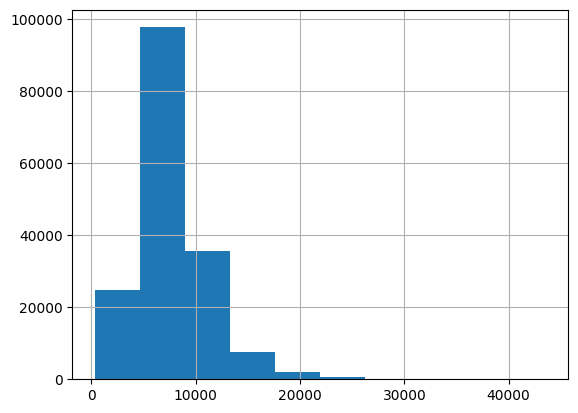

In [ ]:
y.hist()

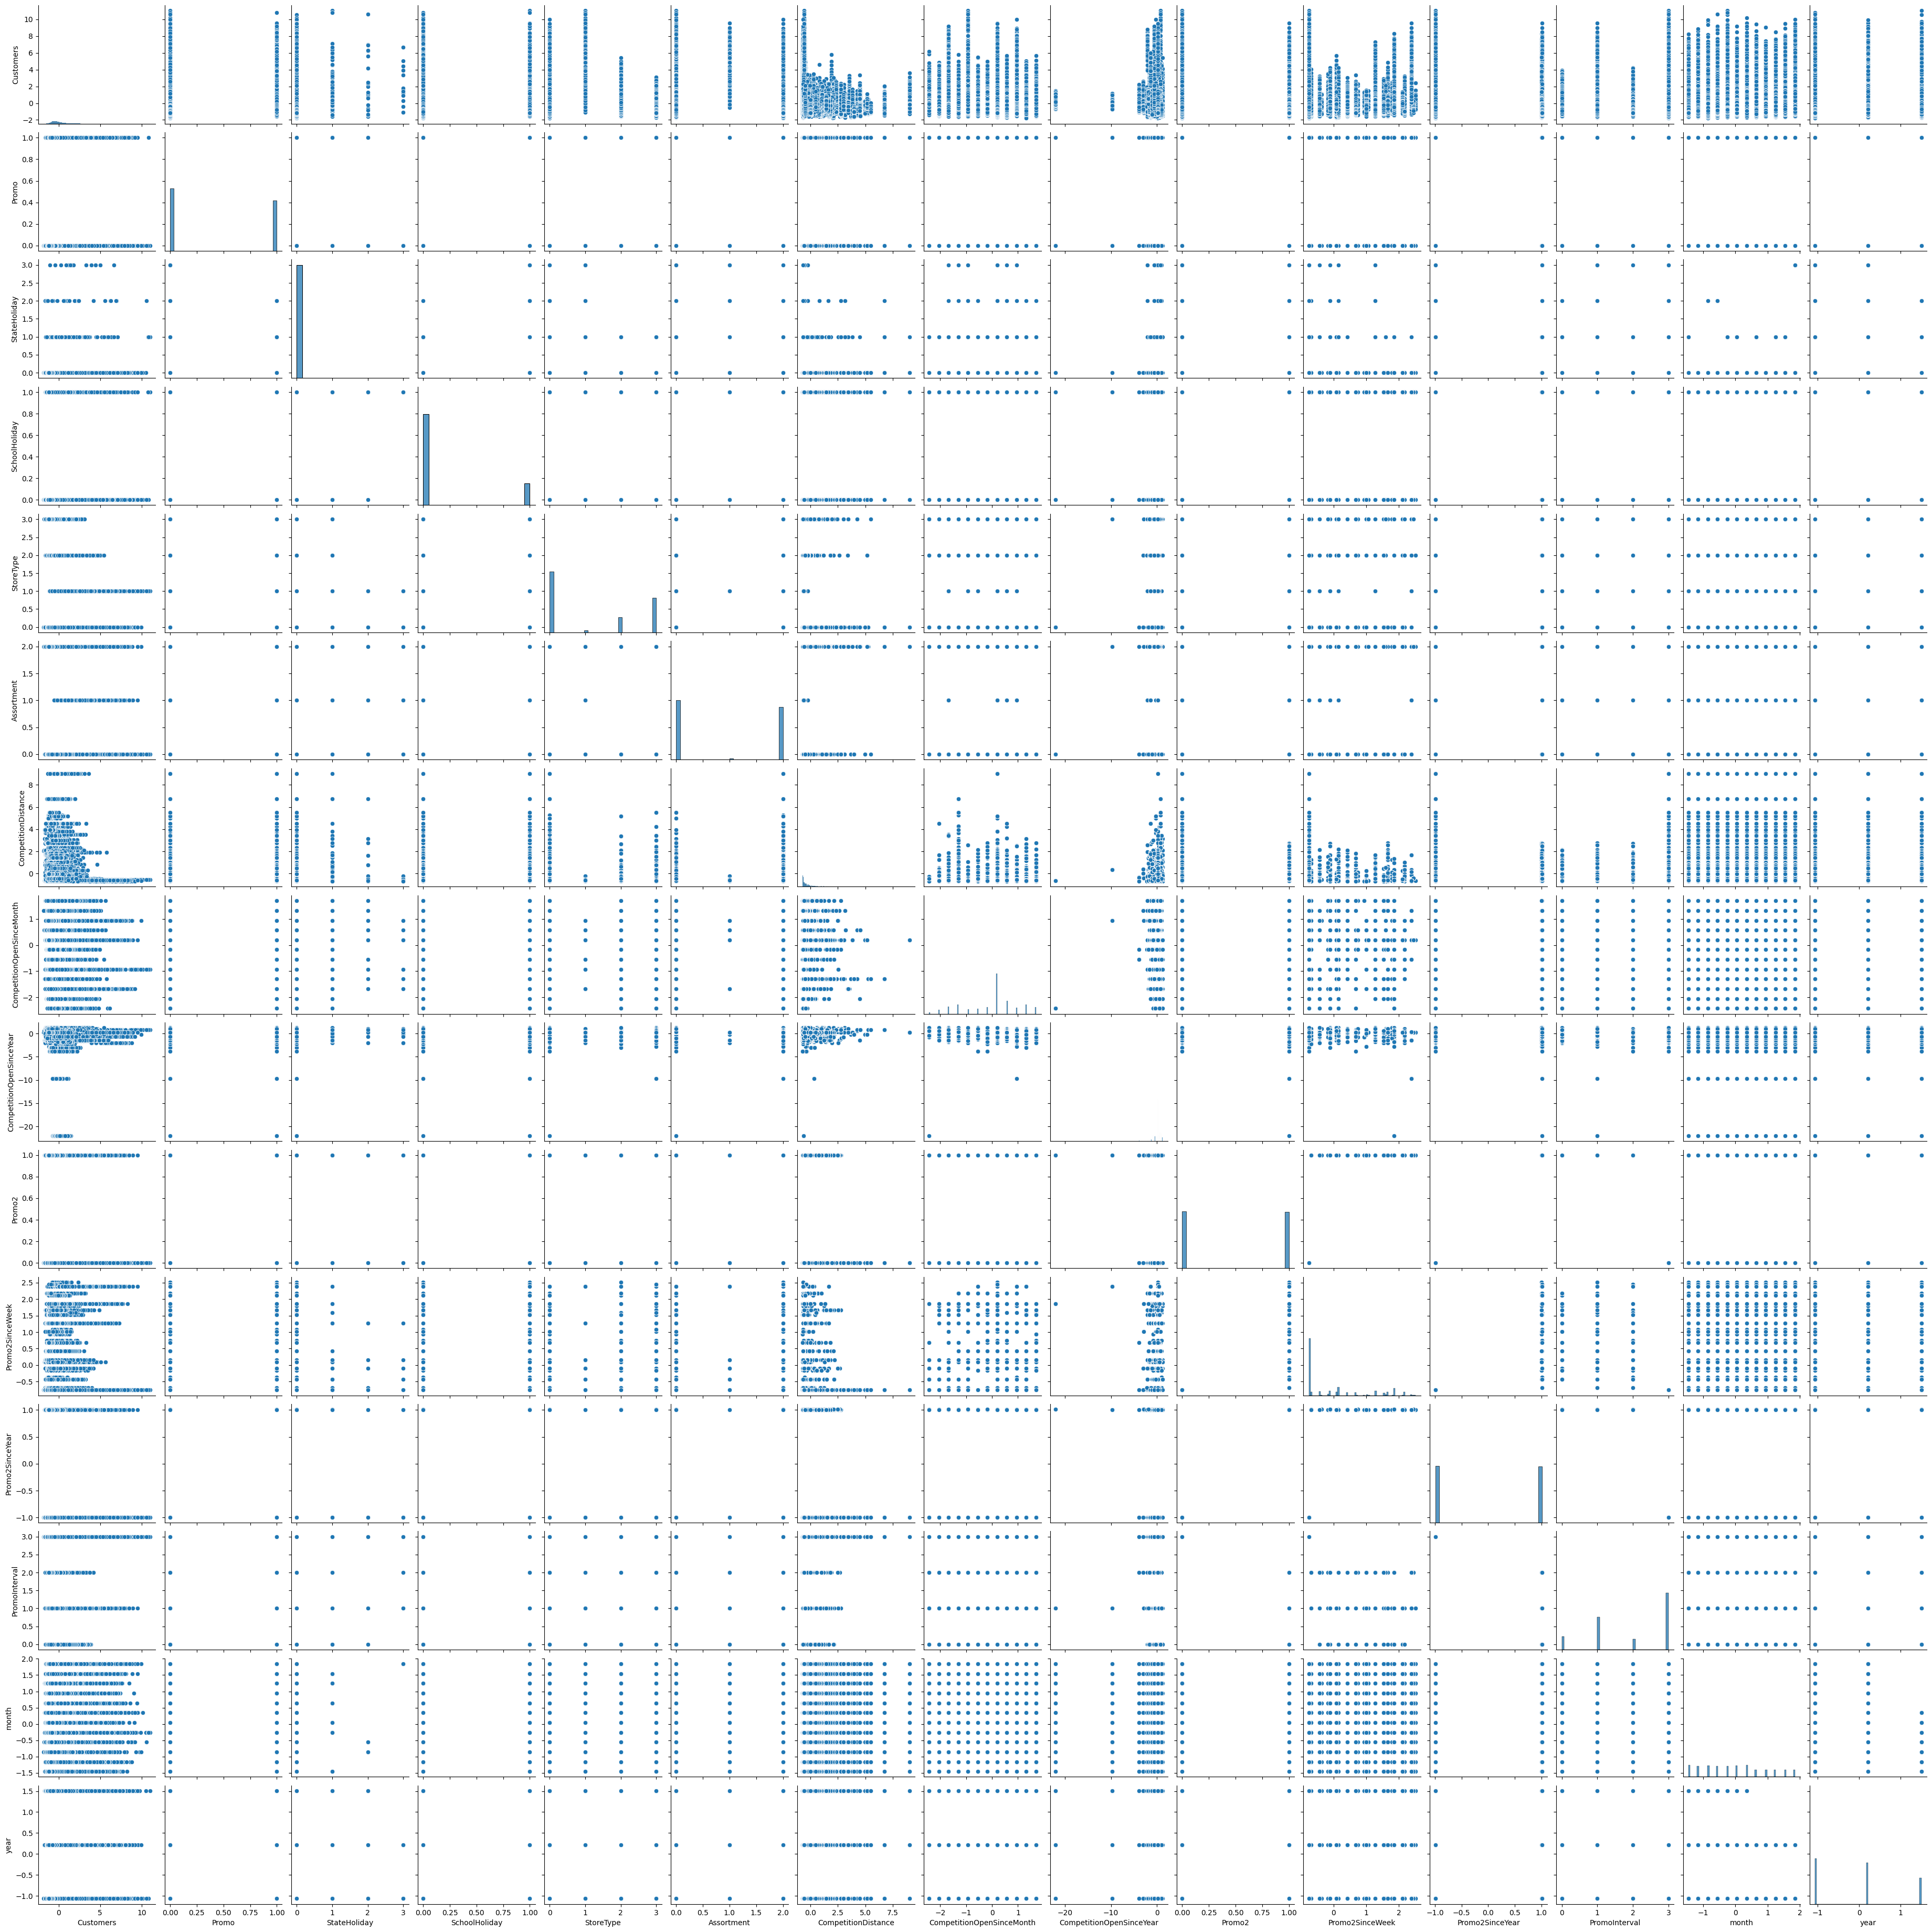

In [ ]:
sns.pairplot(x)

<Axes: >

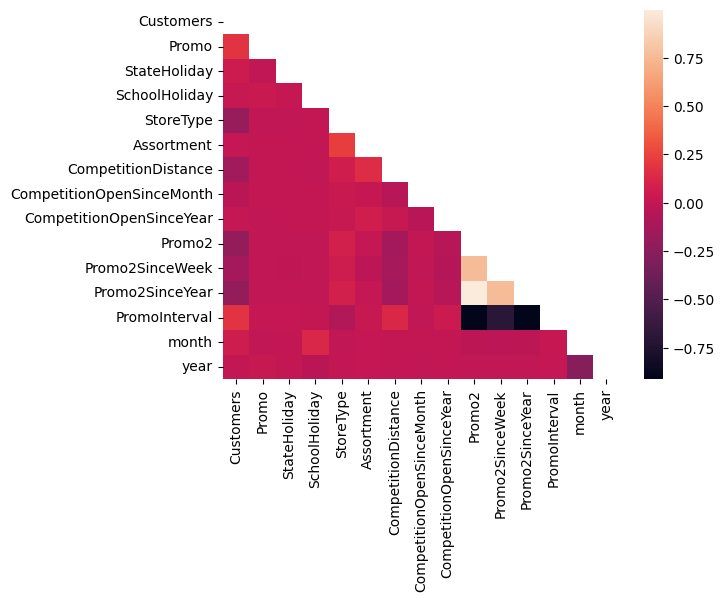

In [ ]:
matrix = np.triu(x.corr())
sns.heatmap(x.corr(), mask = matrix)

In [ ]:
x.to_csv('x_train.csv', index = 0)
y.to_csv('y_train.csv', index = 0)
x_test.to_csv('x_test.csv', index = 0)

# **Modeling**

In [ ]:
from sklearn.metrics import mean_squared_error
import math

In [ ]:
def RMSE(y_actual, y_pered,  **kwargs):
    mse = mean_squared_error(y_actual, y_pered)
    rmse = math.sqrt(mse)
    return rmse

In [ ]:
from sklearn.metrics import make_scorer
RMSE_score = make_scorer(RMSE)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor , BaggingRegressor , StackingRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import r2_score

2024-03-08 10:31:14.203745: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-08 10:31:14.204044: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-08 10:31:14.360209: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Definition of Callbacks**

In [ ]:
# Definition of Checkpoint
#checkpoint_callback = ModelCheckpoint(
    #filepath='Ensemble.weights.h5',
    #monitor='val_accuracy',
    #save_best_only=True,
    #save_weights_only=True,
    #mode='max',
    #verbose=1
#)

# Definition of Early Stop
#early_stopping = EarlyStopping(monitor='val_loss',
 #                              patience=5,
  #                             mode='min',
   #                            verbose = 1
    #                           )

# **Individual Models**

In [ ]:
R2 = []
head = ['Model_Name', 'R2_Score']
name = []

In [ ]:
rgs1 = LinearRegression()
model_lin = rgs1.fit(x, y)
score_lin = cross_val_score(rgs1, x, y, cv = 5, scoring = 'r2')
print(f'The score of Linear model is: {score_lin.mean():.4f}')
name.append('Linear_Regrassion')
R2.append(round(score_lin.mean(), 4))

In [ ]:
rgs2 = SVR(gamma = 'auto', max_iter = 100)
features = { 'kernel' : ['rbf', 'sigmoid'],'coef0' : [-1.0, -0.5, 0.0, 0.5, 1.0], 'C' : [0.5, 1.0, 1.5, 2.0, 3.0]}
search = GridSearchCV(rgs2, features, cv = 5, refit = True, error_score='raise', scoring = 'r2')
score_svr = search.fit(x, y)
print('Best parameters of SVR is: {}'.format(search.best_params_))
print(f'Accuracy of SVR is: {search.best_score_:.4f}')
name.append('SVR')
R2.append(round(search.best_score_, 4))

Best parameters of SVR is: {'C': 3.0, 'coef0': -1.0, 'kernel': 'sigmoid'}
Accuracy of SVR is: -4.2411


In [ ]:
rgs3 = GaussianNB()
model_guass = rgs3.fit(x, y)
score_guass = cross_val_score(rgs3, x, y, cv=5, scoring = 'r2')
print(f'The score of Guassian model is: {score_guass.mean():.4f}')
name.append('Guassian')
R2.append(round(score_guass.mean(), 4))

The score of Guassian model is: -2.2687


In [ ]:
rgs4 = DecisionTreeRegressor(random_state = 42)
features = {'max_depth' : [8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 'min_samples_split' : [0.01, 0.05, 0.1, 0.15, 0.2, 0.25]}
search = GridSearchCV( rgs4, features, cv = 5, refit = True, error_score='raise', scoring = 'r2')
score_desi = search.fit(x, y)
print('Best parameters of Decision Tree is: {}'.format(search.best_params_))
print(f'Accuracy of Decision Tree is: {search.best_score_:.4f}')
name.append('Decision_Tree')
R2.append(round(search.best_score_, 4))

Best parameters of Decision Tree is: {'max_depth': 9, 'min_samples_split': 0.01}
Accuracy of Decision Tree is: 0.8279


In [ ]:
rgs5 = KNeighborsRegressor(weights = 'distance',)
features = {'n_neighbors' : [5, 10, 25, 50] }
search = GridSearchCV( rgs5, features, cv = 5, refit = True, scoring = 'r2')
score_knn = search.fit(x, y)
print('Best parameters of K Neighbours is: {}'.format(search.best_params_))
print(f'Accuracy of K Neighbours is: {search.best_score_:.4f}')
name.append('KNN')
R2.append(round(search.best_score_, 4))

Best parameters of K Neighbours is: {'n_neighbors': 25}
Accuracy of K Neighbours is: 0.7500


In [ ]:
rgs6 = RandomForestRegressor(bootstrap = True, oob_score = True, random_state = 42)
features = {'n_estimators' : [100, 150, 200], 'max_depth' : [1, 2], 'min_samples_split' : [0.01, 0.05, 0.1, 0.15, 0.2, 0.25]}
search = GridSearchCV( rgs6, features, cv = 5, refit = True, scoring = 'r2')
score_rndf = search.fit(x, y)
print('Best parameters of Random Forest is: {}'.format(search.best_params_))
print(f'Accuracy of Random Forest is: {search.best_score_:.4f}')
name.append('Random_Forest')
R2.append(round(search.best_score_, 4))

Best parameters of Random Forest is: {'max_depth': 2, 'min_samples_split': 0.01, 'n_estimators': 100}
Accuracy of Random Forest is: 0.6688


In [ ]:
rgs7 = ExtraTreesRegressor(bootstrap = True, oob_score = True, random_state = 42)
features = {'n_estimators' : [100, 150, 200], 'max_depth' : [1, 2], 'min_samples_split' : [0.01, 0.05, 0.1, 0.15, 0.2, 0.25]}
search = GridSearchCV( rgs7, features, cv = 5, refit = True, scoring = 'r2')
score_extrt = search.fit(x, y)
print('Best parameters of Extra Tree is: {}'.format(search.best_params_))
print(f'Accuracy of Extra Tree is: {search.best_score_:.4f}')
name.append('Extra_Tree')
R2.append(round(search.best_score_, 4))

Best parameters of Extra Tree is: {'max_depth': 2, 'min_samples_split': 0.01, 'n_estimators': 100}
Accuracy of Extra Tree is: 0.5403


# **Voting Model**

According to Results, **SVR**,  **Guassian** & **Extra Tree** models are **not** used in **Voting** model

In [ ]:
report1 = pd.DataFrame()
report1.column = head
report1['Model_Name'] = name
report1['R2_Score'] = R2
report1

,Model_Name,R2_Score
0,Linear_Regrassion,0.8021
1,SVR,-4.2411
2,Guassian,-2.2687
3,Decision_Tree,0.8279
4,KNN,0.7500
5,Random_Forest,0.6688
6,Extra_Tree,0.5403


In [ ]:
# Optimum models
final_lin = LinearRegression()
final_deci = DecisionTreeRegressor(max_depth = 9, min_samples_split = 0.01, random_state = 42)
final_knn = KNeighborsRegressor(n_neighbors = 25, weights = 'distance')
final_rand = RandomForestRegressor(max_depth = 2, min_samples_split = 0.01, n_estimators = 100, bootstrap = True, oob_score = True, random_state = 42)


In [ ]:
rgs = VotingRegressor(estimators = [('lin',final_lin), ('deci',final_deci), ('knn', final_knn), ('rand', final_rand)])
model_vot = rgs.fit(x, y)
score_vot = cross_val_score(rgs, x, y, cv=5, scoring = 'r2')
print(f'The score of Voting model is: {score_vot.mean():.4f}')
name.append('Voting_Model')
R2.append(round(score_vot.mean(), 4))

The score of Voting model is: 0.8225


Question: How we can improve the voting model?

Answer: only use robust models, like below...

In [ ]:
rgs11 = VotingRegressor(estimators = [('lin',final_lin), ('deci',final_deci)])
model_vot = rgs11.fit(x, y)
score_vot = cross_val_score(rgs11, x, y, cv=5, scoring = 'r2')
print(f'The score of Improved_Voting model is : {score_vot.mean():.4f}')
name.append('Improved_Voting')
R2.append(round(score_vot.mean(), 4))

The score of Improved_Voting model is : 0.8370


In [ ]:
report2 = pd.DataFrame()
report2.column = head
report2['Model_Name'] = name
report2['R2_Score'] = R2
report2

,Model_Name,R2_Score
0,Linear_Regrassion,0.8021
1,SVR,-4.2411
2,Guassian,-2.2687
3,Decision_Tree,0.8279
4,KNN,0.7500
5,Random_Forest,0.6688
6,Extra_Tree,0.5403
7,Voting_Model,0.8225
8,Improved_Voting,0.8370


As can see, voting Model has operation equal to Decision tree

# **Bagging**

In [ ]:
bg_lin = BaggingRegressor(estimator = LinearRegression(),bootstrap_features = False, bootstrap = True, oob_score = True, random_state = 42 )
features = { 'n_estimators' : [40, 50, 70]}
search = GridSearchCV(bg_lin, features, cv = 5, refit = True, error_score='raise', scoring = 'r2')
score_bg_log = search.fit(x, y)
print('Best parameters of Bagging of Linear is: {}'.format(search.best_params_))
print(f'Accuracy of Linear is: {search.best_score_:.4f}')
name.append('Bagging_Linear')
R2.append(round(search.best_score_, 4))

Best parameters of Bagging of Linear is: {'n_estimators': 50}
Accuracy of Linear is: 0.8021


# **Boosting**

In [ ]:
#red_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.8, patience=5, verbose=0, mode="min", min_delta=0.001, cooldown=0, min_lr=0.1)

In [ ]:
ada_lin = AdaBoostRegressor(estimator = LinearRegression(), learning_rate = 0.1, loss = 'exponential', random_state = 42)
features = {'n_estimators' : [1, 2, 3, 4, 5]}
search = GridSearchCV(ada_lin, features,cv = 5, refit = True, scoring = 'r2')
score_ada_tree = search.fit(x, y)
print('Best parameters of Boosting of Linear is: {}'.format(search.best_params_))
print(f'Accuracy of Boosting of Linear is: {search.best_score_:.4f}')
name.append('Boosting_Linear')
R2.append(round(search.best_score_, 4))

Best parameters of Boosting of Linear is: {'n_estimators': 1}
Accuracy of Boosting of Linear is: 0.8024


In [ ]:
ada_tree = AdaBoostRegressor(estimator = DecisionTreeRegressor(max_depth = 9, min_samples_split = 0.01, random_state = 42), learning_rate = 0.1, loss = 'exponential', random_state = 42)
features = {'n_estimators' : [120, 140, 150]}
search = GridSearchCV(ada_tree, features,cv = 5, refit = True, scoring = 'r2')
score_ada_tree = search.fit(x, y)
print('Best parameters of Boosting of Decision Tree is: {}'.format(search.best_params_))
print(f'Accuracy of Boosting of Decision Tree is: {search.best_score_:.4f}')
name.append('Boosting_Tree')
R2.append(round(search.best_score_, 4))

Best parameters of Boosting of Decision Tree is: {'n_estimators': 120}
Accuracy of Boosting of Decision Tree is: 0.8595


In [ ]:
gra = GradientBoostingRegressor(min_samples_split = 0.01, learning_rate = 0.5, random_state = 42)
features = { 'n_estimators' : [35, 38, 40, 42, 50]}
search = GridSearchCV(gra, features,cv = 5, refit = True, scoring = 'r2')
score_gra = search.fit(x, y)
print('Best parameters of Boosting of Gradient Boosting is: {}'.format(search.best_params_))
print(f'Accuracy of Boosting of Gradient Boosting is: {search.best_score_:.4f}')
name.append('Gradient_Boosting')
R2.append(round(search.best_score_, 4))

Best parameters of Boosting of Gradient Boosting is: {'n_estimators': 42}
Accuracy of Boosting of Gradient Boosting is: 0.8691


In [ ]:
report3 = pd.DataFrame()
report3.column = head
report3['Model_Name'] = name
report3['R2_Score'] = R2
report3

,Model_Name,R2_Score
0,Linear_Regrassion,0.8021
1,SVR,-4.2411
2,Guassian,-2.2687
3,Decision_Tree,0.8279
4,KNN,0.7500
5,Random_Forest,0.6688
6,Extra_Tree,0.5403
7,Voting_Model,0.8225
8,Improved_Voting,0.8370
9,Bagging_Linear,0.8021


# **Stacking The Models**

In [ ]:
# Best Models:
gra = GradientBoostingRegressor(n_estimators = 42, min_samples_split = 0.01, learning_rate = 0.5, random_state = 42)
ada_tree = AdaBoostRegressor(estimator = DecisionTreeRegressor(max_depth = 9, min_samples_split = 0.01, random_state = 42), n_estimators = 140, learning_rate = 0.1, loss = 'exponential', random_state = 42)
ada_lin = AdaBoostRegressor(estimator = LinearRegression(), n_estimators = 1, learning_rate = 0.1, loss = 'exponential', random_state = 42)
bg_log = BaggingRegressor(estimator = LinearRegression(),n_estimators = 50, bootstrap_features = False, bootstrap = True, oob_score = True, random_state = 42 )
final_lin = LinearRegression()
final_deci = DecisionTreeRegressor(max_depth = 9, min_samples_split = 0.01, random_state = 42)

In [ ]:
stk = StackingRegressor(estimators = [('gra_bost',gra), ('ada_tree',ada_tree), ('ada_lin', ada_lin), ('bg_log', bg_log), ('simp_lin', final_lin), ('simp_deci', final_deci)])
features = {'final_estimator' : [DecisionTreeRegressor() , LinearRegression()]}
search = GridSearchCV(stk, features, cv = 5, refit = True, error_score='raise', scoring = 'r2')
score_stk = search.fit(x, y)
print(f'The best Parameters for Stacking Model is: {search.best_params_}')
print(f'The score of Stacking model is: {search.best_score_:.4f}')
name.append('Stacking_best')
R2.append(round(search.best_score_, 4))

The best Parameters for Stacking Model is: {'final_estimator': LinearRegression()}
The score of Stacking model is: 0.8761


In [ ]:
stk = StackingRegressor(estimators = [('gra_bost',gra), ('ada_tree',ada_tree)], final_estimator = LinearRegression() )
model_vot = stk.fit(x, y)
score_vot = cross_val_score(stk, x, y, cv=5, scoring = 'r2')
print(f'The score of Improved Stacking Model is: {score_vot.mean():.4f}')
name.append('Improved_Stacking')
R2.append(round(score_vot.mean(), 4))

The score of Improved Stacking Model is: 0.8757


In [ ]:
rgs12 = VotingRegressor(estimators = [('gra_bost',gra), ('ada_tree',ada_tree), ('ada_lin', ada_lin), ('bg_log', bg_log), ('simp_lin', final_lin), ('simp_deci', final_deci)])
model_vot = rgs12.fit(x, y)
score_vot = cross_val_score(rgs12, x, y, cv=5, scoring = 'r2')
print(f'The score of Votting Best models is: {score_vot.mean():.4f}')
name.append('Voting_Best')
R2.append(round(score_vot.mean(), 4))

The score of Votting Best models is: 0.8531


In [ ]:
rgs13 = VotingRegressor(estimators = [('gra_bost',gra), ('ada_tree',ada_tree)])
model_vot = rgs13.fit(x, y)
score_vot = cross_val_score(rgs13, x, y, cv=5, scoring = 'r2')
print(f'the score of Improved Votting Best models is : {score_vot.mean():.4f}')
name.append('Improved_Voting_Best')
R2.append(round(score_vot.mean(), 4))

the score of Improved Votting Best models is : 0.8755


In [ ]:
Result = pd.DataFrame()
Result.column = head
Result['Model_Name'] = name
Result['R2_Score'] = R2
Result.to_csv('Result_acc_models.csv', index = 0)
Result

,Model_Name,R2_Score
0,Linear_Regrassion,0.8021
1,SVR,-4.2411
2,Guassian,-2.2687
3,Decision_Tree,0.8279
4,KNN,0.7500
5,Random_Forest,0.6688
6,Extra_Tree,0.5403
7,Voting_Model,0.8225
8,Improved_Voting,0.8370
9,Bagging_Linear,0.8021


According to **Result**, three **<Stacking_Best>**, **<Improved_Stacking>** & **<Improved_Voting_all>** are the **equal** performance. so there are used for **prediction** x_test:

In [ ]:
stk_all = StackingRegressor(estimators = [('gra_bost',gra), ('ada_tree',ada_tree), ('ada_lin', ada_lin), ('bg_log', bg_log), ('simp_lin', final_lin), ('simp_deci', final_deci)], final_estimator = LinearRegression())
imp_stk = StackingRegressor(estimators = [('gra_bost',gra), ('ada_tree',ada_tree)], final_estimator = LinearRegression())
imp_vot_all = VotingRegressor(estimators = [('gra_bost',gra), ('ada_tree',ada_tree)])

for Choosing the best model, we evaluate the according to **RMSE** Score:

In [ ]:
RMSE_Scores =[]
R2_Scores = []
header = ['Model_Name', 'RMSE_Score', 'R2_Score']
names = []

In [ ]:
model_stk_all = stk_all.fit(x, y)
score_stk_all_rmse = cross_val_score(model_stk_all, x, y, cv=5, scoring = RMSE_score)
print(f'RMSE score of Stacking model is: {score_stk_all_rmse.mean():.4f}')
score_stk_all_r2 = cross_val_score(model_stk_all, x, y, cv=5, scoring = 'r2')
print(f'R2 score of Stacking model is: {score_stk_all_r2.mean():.4f}')
names.append('Stacking_best')
RMSE_Scores.append(round(score_stk_all_rmse.mean(), 4))
R2_Scores.append(round(score_stk_all_r2.mean(), 4))

RMSE score of Stacking model is: 1197.2076
R2 score of Stacking model is: 0.8761


In [ ]:
model_imp_stk = imp_stk.fit(x, y)
score_imp_stk_rmse = cross_val_score(model_imp_stk, x, y, cv=5, scoring = RMSE_score)
print(f'RMSE score of Improved Stacking model is: {score_imp_stk_rmse.mean():.4f}')
score_imp_stk_r2 = cross_val_score(model_imp_stk, x, y, cv=5, scoring = 'r2')
print(f'R2 score of Improved Stacking model is: {score_imp_stk_r2.mean():.4f}')
names.append('Improved_Stacking')
RMSE_Scores.append(round(score_imp_stk_rmse.mean(), 4))
R2_Scores.append(round(score_imp_stk_r2.mean(), 4))

RMSE score of Improved Stacking model is: 1199.2464
R2 score of Improved Stacking model is: 0.8757


In [ ]:
model_imp_vot_all = imp_vot_all.fit(x, y)
score_imp_vot_all_rmse = cross_val_score(model_imp_vot_all, x, y, cv=5, scoring = RMSE_score)
print(f'RMSE score of Improved Voting Best model is: {score_imp_vot_all_rmse.mean():.4f}')
score_imp_vot_all_r2 = cross_val_score(model_imp_vot_all, x, y, cv=5, scoring = 'r2')
print(f'R2 score of Improved Voting Best model is: {score_imp_vot_all_r2.mean():.4f}')
names.append('Improved_Voting_Best')
RMSE_Scores.append(round(score_imp_vot_all_rmse.mean(), 4))
R2_Scores.append(round(score_imp_vot_all_r2.mean(), 4))

RMSE score of Improved Voting Best model is: 1201.2361
R2 score of Improved Voting Best model is: 0.8755


In [ ]:
final_result = pd.DataFrame()
final_result.column = header
final_result['Model_Name'] = names
final_result['RMSE_Score'] = RMSE_Scores
final_result['R2_Score'] = R2_Scores
final_result.to_csv('Score_of_Final_Models.csv', index = 0)
final_result

,Model_Name,RMSE_Score,R2_Score
0,Stacking_best,1197.2076,0.8761
1,Improved_Stacking,1199.2464,0.8757
2,Improved_Voting_Best,1201.2361,0.8755


In [ ]:
model_stk_all = stk_all.fit(x, y)
y_pered_stk_all = model_stk_all.predict(x_test)

In [ ]:
prediction = pd.DataFrame()
prediction.column = ['id', 'Sales']
prediction['id'] = Id
prediction['Sales'] = y_pered_stk_all
prediction.to_csv('Prediction_Result.csv', index = 0)